In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [103]:
df=pd.read_csv("soft_pf0.2_sp015_lp020_reduced10.overlaps",delim_whitespace=True)
df = df[df.time < 4.2]
df['n_tangled'] = df['n_total_crossings_init']-df['n_total_crossings_complete']
df['net']=df['n_tangled']-df['n_instant_bond_overlaps']

df2=pd.read_csv("soft_pf0.2_sp025_lp020_reduced10.overlaps",delim_whitespace=True)
df2 = df2[df2.time < 4.2]
df2['n_tangled'] = df2['n_total_crossings_init']-df2['n_total_crossings_complete']
df2['net']=df2['n_tangled']-df2['n_instant_bond_overlaps']

df3=pd.read_csv("soft_pf0.2_sp050_lp020_reduced10.overlaps",delim_whitespace=True)
df3 = df3[df3.time < 4.2]
df3['n_tangled'] = df3['n_total_crossings_init']-df3['n_total_crossings_complete']
df3['net']=df3['n_tangled']-df3['n_instant_bond_overlaps']

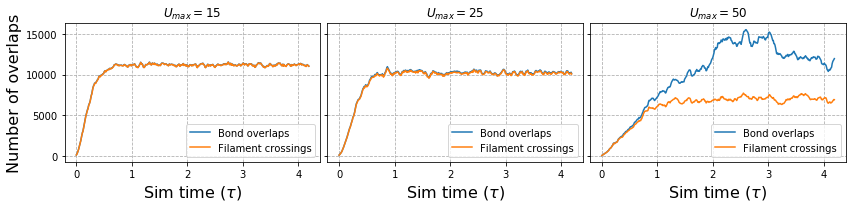

In [120]:
fig,ax = plt.subplots(1,3,figsize=(12,3),sharey=True)
df.plot(x="time",y="n_instant_bond_overlaps",ax=ax[0])
df.plot(x="time",y="n_tangled",ax=ax[0])
ax[0].set_title(r'$U_{max}=15$')
ax[1].set_title(r'$U_{max}=25$')
ax[2].set_title(r'$U_{max}=50$')
df2.plot(x="time",y="n_instant_bond_overlaps",ax=ax[1])
df2.plot(x="time",y="n_tangled",ax=ax[1])
df3.plot(x="time",y="n_instant_bond_overlaps",ax=ax[2])
df3.plot(x="time",y="n_tangled",ax=ax[2])
for a in ax:
    a.set_ylabel("Number of overlaps",fontsize=16)
    a.set_xlabel(r"Sim time ($\tau$)",fontsize=16)
    #a.legend([])
    a.legend(['Bond overlaps','Filament crossings'],loc=4)
    a.grid(True,linestyle='--')
fig.tight_layout(w_pad=0)

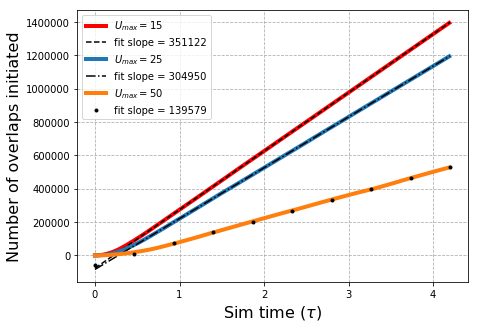

In [121]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
df.plot(x="time",y="n_total_crossings_init",ax=ax,linewidth=4,style='red')
dftemp = df[df.time > 1]
model=sm.OLS(dftemp.n_total_crossings_init,sm.add_constant(dftemp.time))
model=model.fit()
fit=lambda y: model.params[0] + model.params[1]*y
xx=np.linspace(0,4.2,10)
ax.plot(xx,fit(xx),'k--')
df2.plot(x="time",y="n_total_crossings_init",ax=ax,linewidth=4)
df2temp = df2[df2.time > 1]
model2=sm.OLS(df2temp.n_total_crossings_init,sm.add_constant(df2temp.time))
model2=model2.fit()
fit2=lambda y: model2.params[0] + model2.params[1]*y
ax.plot(xx,fit2(xx),'k-.')
df3.plot(x="time",y="n_total_crossings_init",ax=ax,linewidth=4)
df3temp = df3[df3.time > 1]
model3=sm.OLS(df3temp.n_total_crossings_init,sm.add_constant(df3temp.time))
model3=model3.fit()
fit3=lambda y: model3.params[0] + model3.params[1]*y
ax.plot(xx,fit3(xx),'k.')
ax.set_ylabel("Number of overlaps initiated",fontsize=16)
ax.set_xlabel(r"Sim time ($\tau$)",fontsize=16)
ax.legend([r'$U_{max}=15$','fit slope = %5.0f'%model.params[1],r'$U_{max}=25$','fit slope = %5.0f'%model2.params[1],r'$U_{max}=50$','fit slope = %5.0f'%model3.params[1]])
ax.grid(True,linestyle='--')

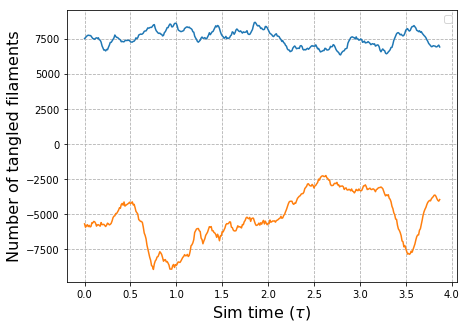

In [31]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
df.plot(x="time",y="n_tangled",ax=ax)
df.plot(x="time",y="net",ax=ax)
ax.set_ylabel("Number of tangled filaments",fontsize=16)
ax.set_xlabel(r"Sim time ($\tau$)",fontsize=16)
ax.legend([])
ax.grid(True,linestyle='--')